In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('1645792390_cep1_dataset.xlsx')

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df=df.drop_duplicates()

In [6]:
df.shape

(302, 14)

In [7]:
df['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [8]:
df['trestbps'].max()

200

In [9]:
df['trestbps'].min()

94

In [10]:
df=df.assign(blood_pressure='')
for i,row in df.iterrows():
    if row['trestbps']<100:
        df.loc[i,'blood_pressure']='lessthan100'
    elif row['trestbps']<120:
        df.loc[i,'blood_pressure']='lessthan120'
    if row['trestbps']<150:
        df.loc[i,'blood_pressure']='lessthan150'
    elif row['trestbps']<180:
        df.loc[i,'blood_pressure']='lessthan180'
    else:
        df.loc[i,'blood_pressure']='180-200'

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,blood_pressure
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,lessthan150
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,lessthan150
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,lessthan150
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,lessthan150
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,lessthan150


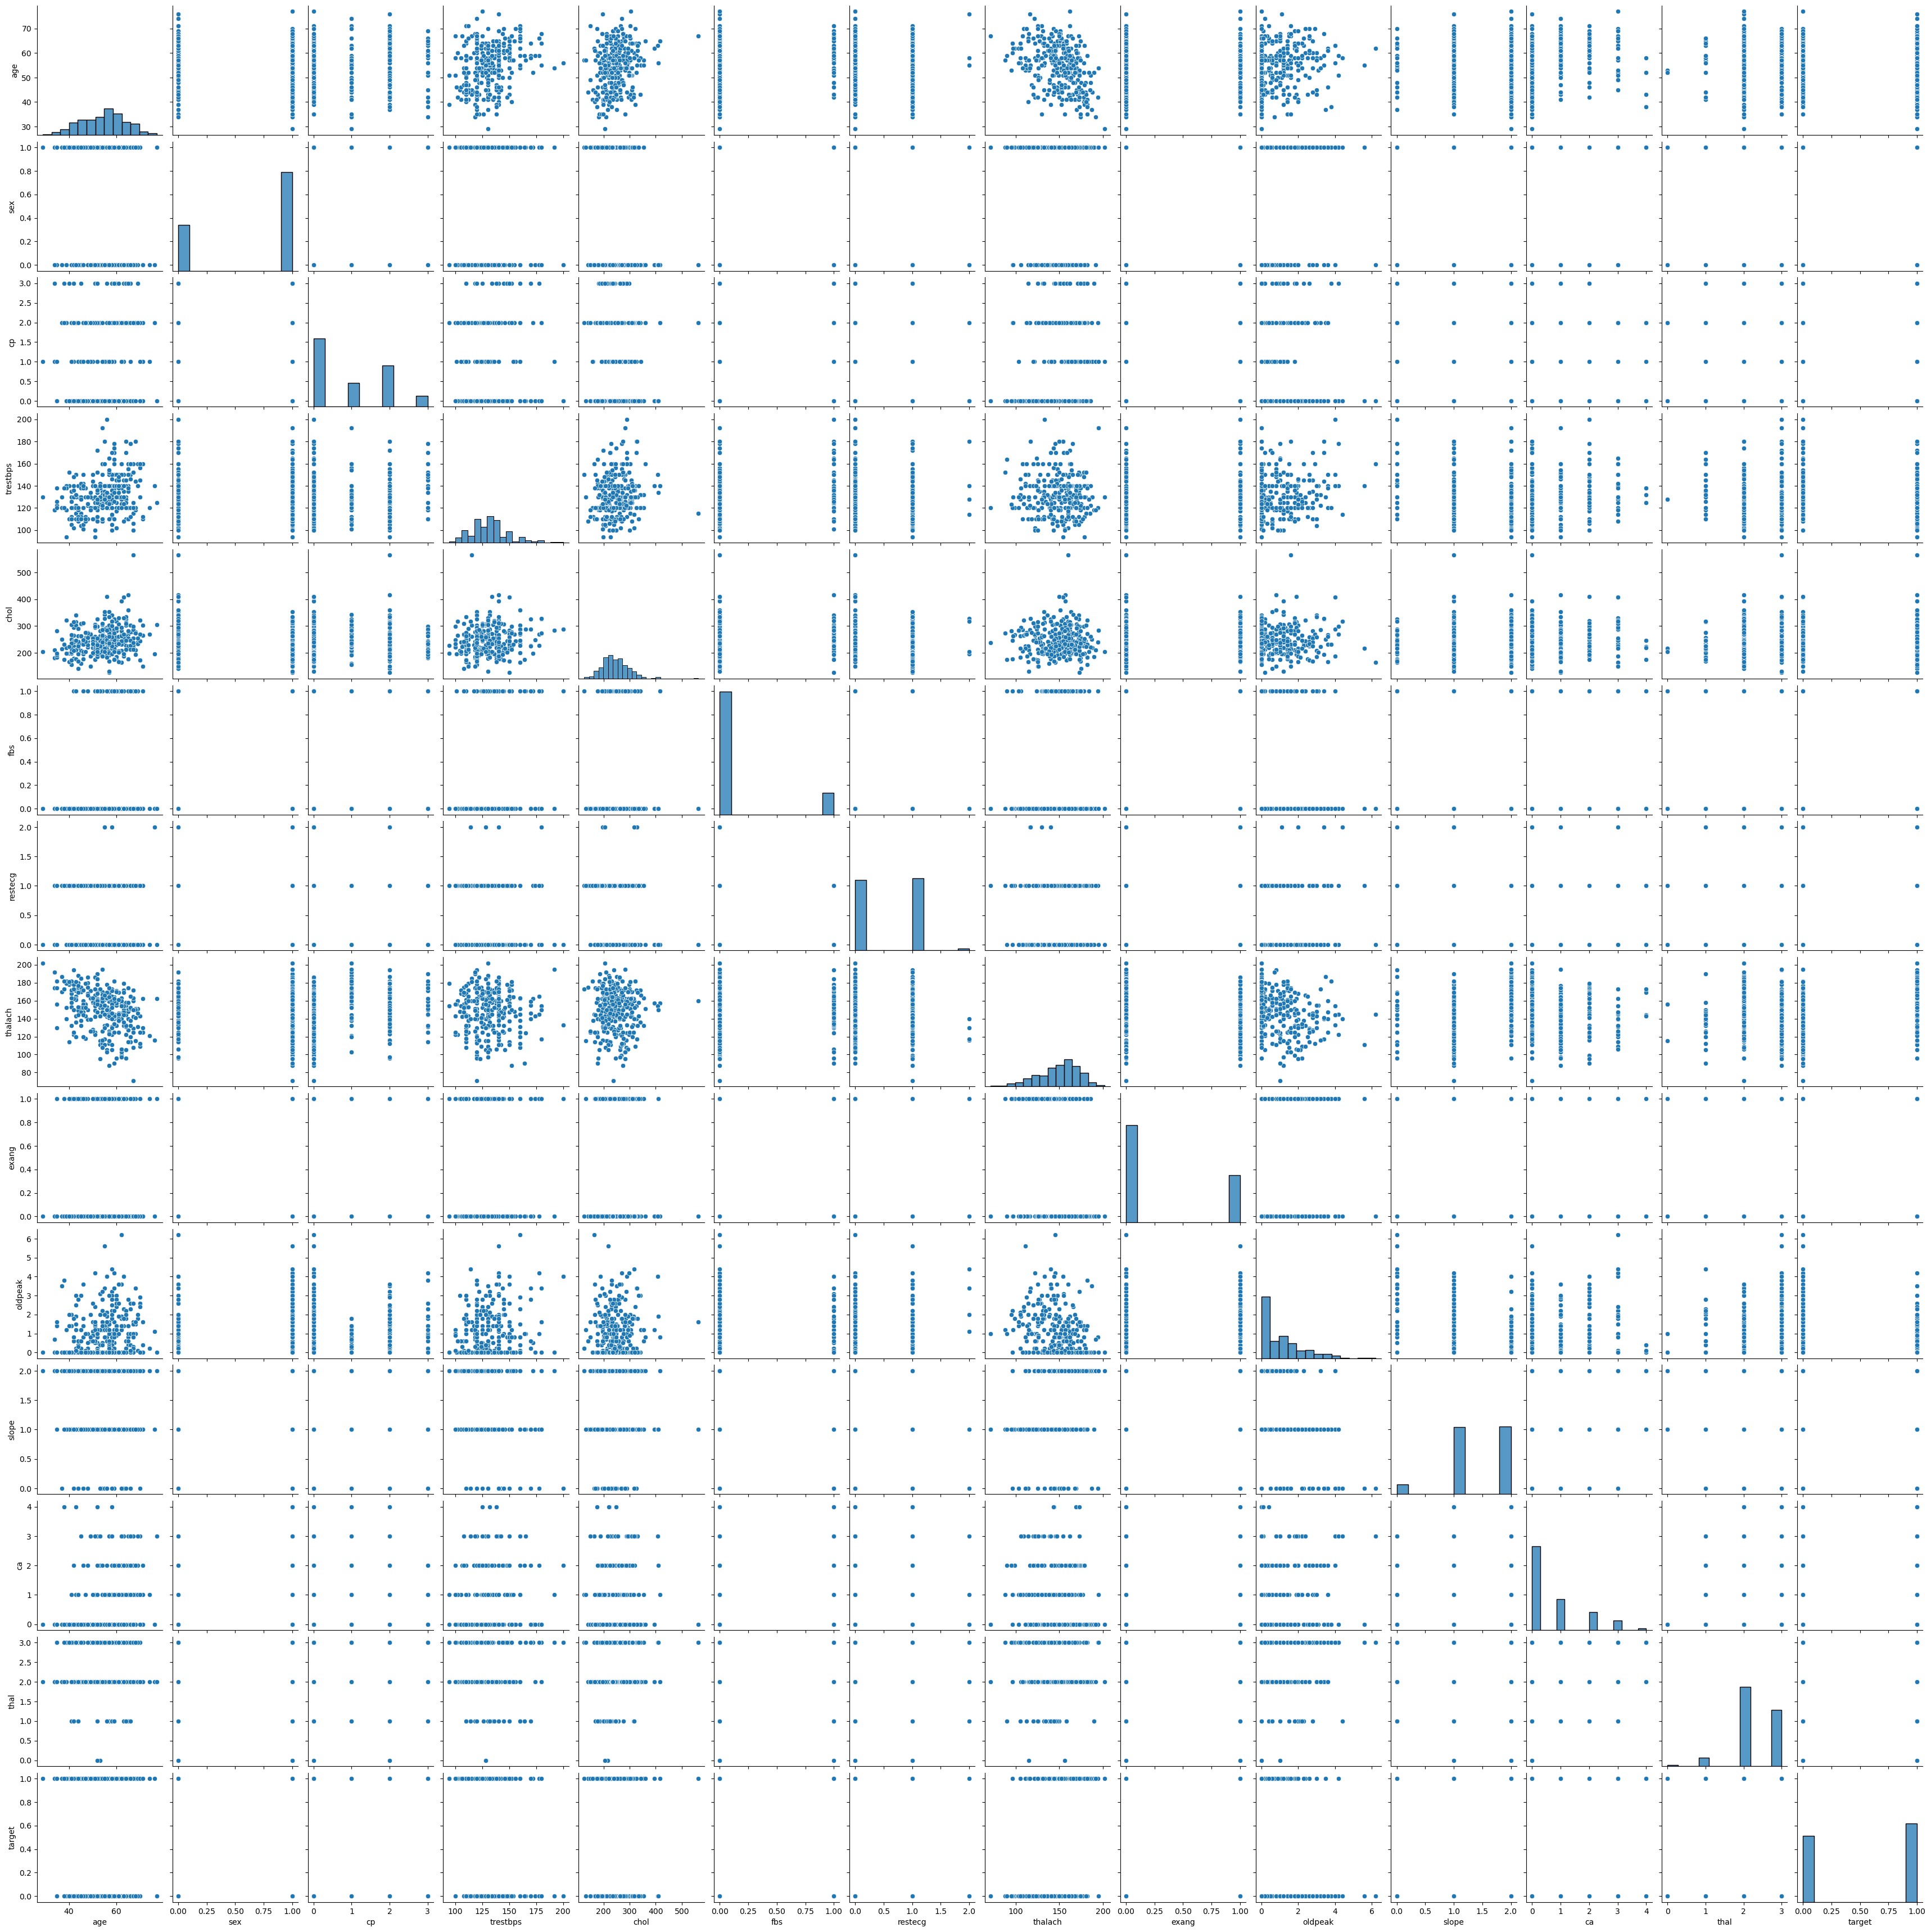

In [12]:
sns.pairplot(df)

In [13]:
def draw_missing_data_table(df):
 total = df.isnull().sum().sort_values(ascending=False)
 percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
 missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
 return missing_data

In [14]:
draw_missing_data_table(df)

,Total,Percent
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


In [15]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,blood_pressure


In [16]:
df=df.assign(affected='')
for i,row in df.iterrows():
    if row['target'] == 1:
        df.loc[i,'affected']='affected'
    else:
        df.loc[i,'affected']='not affected'

In [17]:
df.shape

(302, 16)

In [18]:
df=df.drop_duplicates()

In [19]:
df.shape

(302, 16)

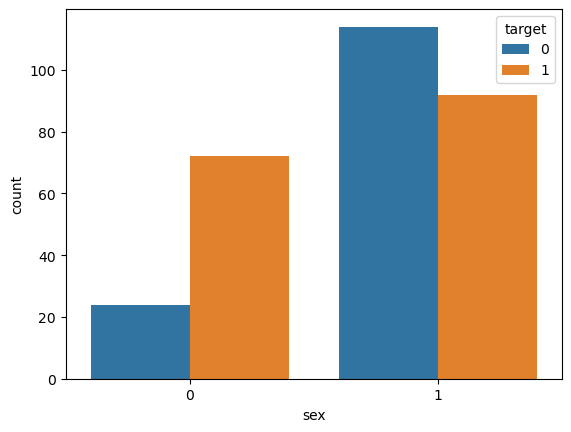

In [20]:
sns.countplot(x=df['sex'],hue=df['target'])
plt.show()

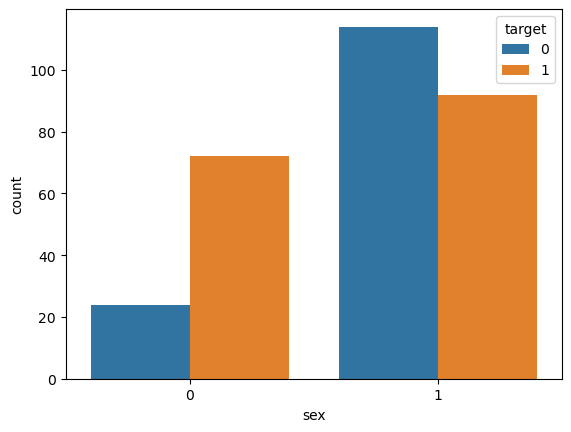

In [21]:
sns.countplot(x=df['sex'],hue=df['target'])
plt.show()

In [22]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

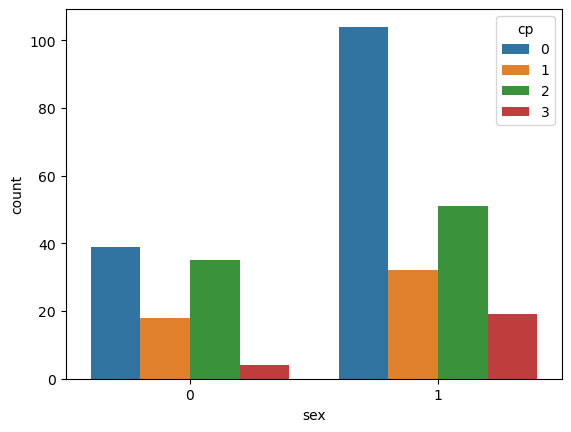

In [23]:
sns.countplot(x=df['sex'],hue=df['cp'])
plt.show()

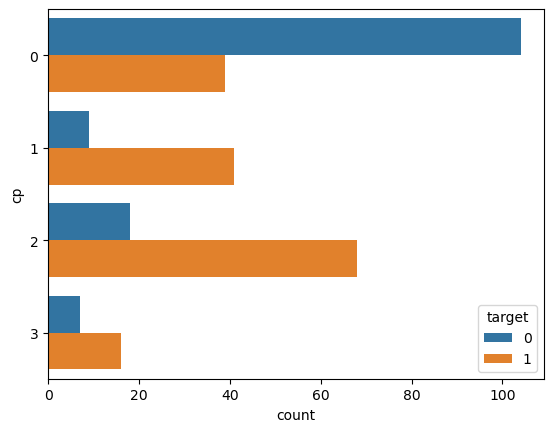

In [24]:
sns.countplot(y=df['cp'],hue=df['target'])
plt.show()

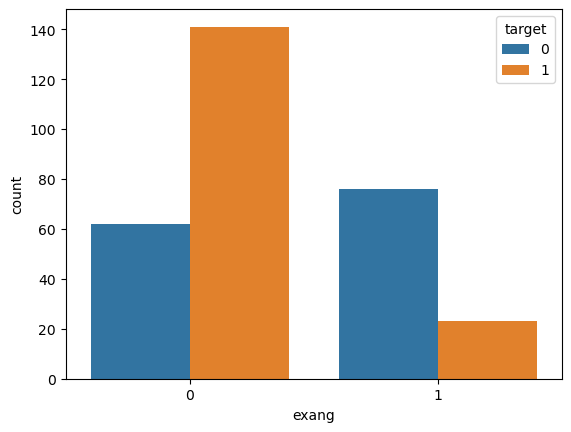

In [25]:
sns.countplot(x=df['exang'],hue=df['target'])
plt.show()

In [26]:
df['target'].mode()

0    1
Name: target, dtype: int64

Study the occurrence of CVD across the Age category

In [27]:
df['age'].count()

302

In [28]:
df['age'].max()

77

In [29]:
df['age'].min()

29

In [30]:
df['age_range']=0

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,blood_pressure,affected,age_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,lessthan150,affected,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,lessthan150,affected,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,lessthan150,affected,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,lessthan150,affected,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,lessthan150,affected,0


In [32]:
for i, row in df.iterrows():
    if row['age'] < 30:
        df.loc[i, 'age_range'] = '<30'
    elif row['age'] < 40:
        df.loc[i, 'age_range'] = '30-39'
    elif row['age'] < 50:
        df.loc[i, 'age_range'] = '40-49'
    elif row['age'] < 60:
        df.loc[i, 'age_range'] = '50-59'
    else:
        df.loc[i, 'age_range'] = '60+'


In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,blood_pressure,affected,age_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,lessthan150,affected,60+
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,lessthan150,affected,30-39
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,lessthan150,affected,40-49
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,lessthan150,affected,50-59
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,lessthan150,affected,50-59


<AxesSubplot:xlabel='age_range', ylabel='target'>

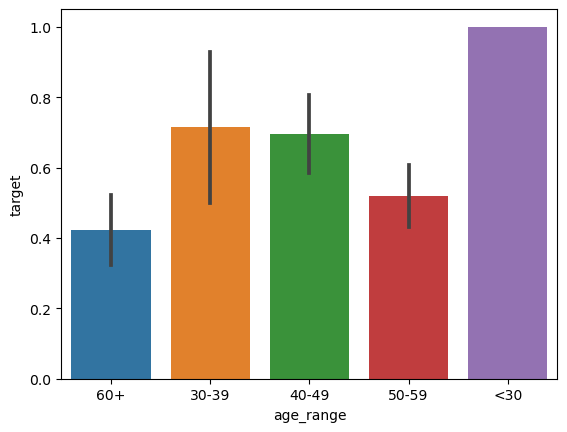

In [34]:
sns.barplot(x=df['age_range'],y=df['target'])

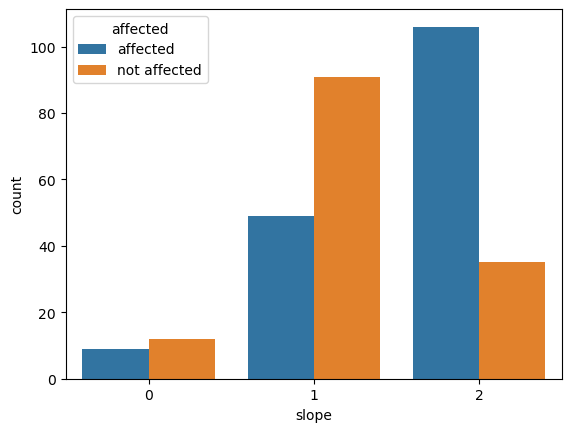

In [35]:
sns.countplot(x=df['slope'],hue=df['affected'])
plt.show()

<AxesSubplot:xlabel='affected', ylabel='slope'>

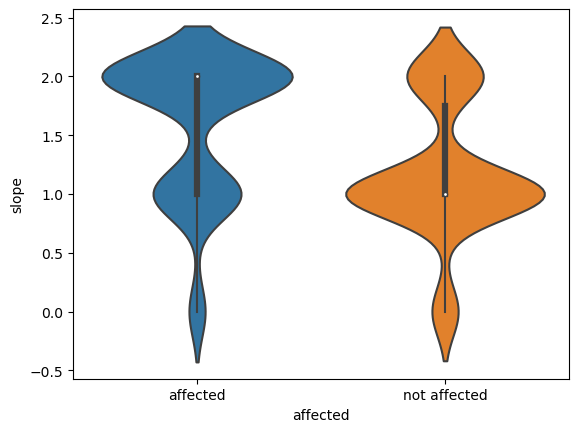

In [36]:
sns.violinplot(x=df['affected'],y=df['slope'])

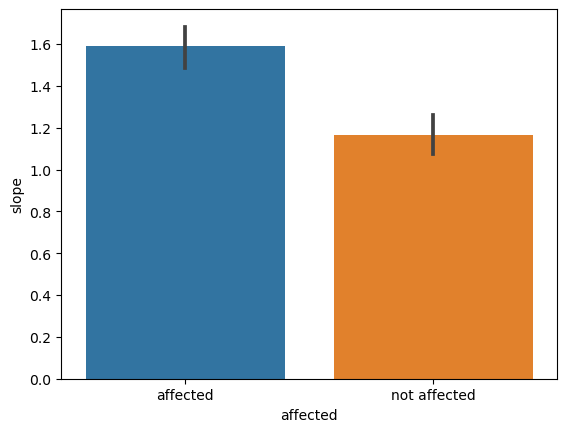

In [37]:
sns.barplot(y=df['slope'],x=df['affected'])
plt.show()

In [38]:
df['slope'].value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

0-No Physical activity
1-Medium Physical activity
2-More Physical activity
From the above countplot we can guess that the people doing more excerise

<AxesSubplot:xlabel='age_range', ylabel='count'>

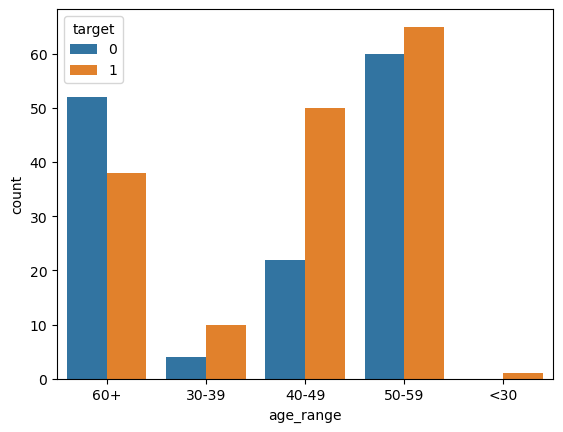

In [39]:
sns.countplot(x=df['age_range'],hue=df['target'])

In [40]:
df['chol'].count()

302

In [41]:
df['chol'].max()

564

In [42]:
df['chol'].min()

126

In [43]:
df=df.assign(chol_range='')

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,blood_pressure,affected,age_range,chol_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,lessthan150,affected,60+,
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,lessthan150,affected,30-39,
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,lessthan150,affected,40-49,
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,lessthan150,affected,50-59,
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,lessthan150,affected,50-59,


In [45]:
for i,row in df.iterrows():
    if row['chol']<200:
        df.loc[i,'chol_range'] ='<200'
    elif row['chol']<300:
        df.loc[i,'chol_range'] = '200-300'
    elif row['chol']<400:
        df.loc[i,'chol_range'] = '300-400'
    elif row['chol']<500:
        df.loc[i,'chol_range'] = '400-500'
    else:
        df.loc[i,'chol_range'] = '500-600'

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,blood_pressure,affected,age_range,chol_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,lessthan150,affected,60+,200-300
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,lessthan150,affected,30-39,200-300
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,lessthan150,affected,40-49,200-300
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,lessthan150,affected,50-59,200-300
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,lessthan150,affected,50-59,300-400


<AxesSubplot:xlabel='chol_range', ylabel='count'>

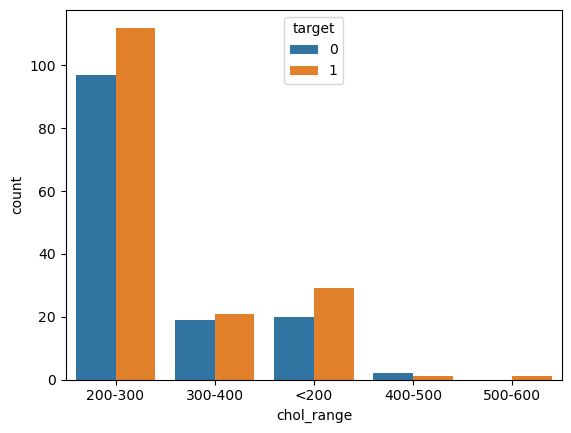

In [47]:
sns.countplot(x=df['chol_range'],hue=df['target'])

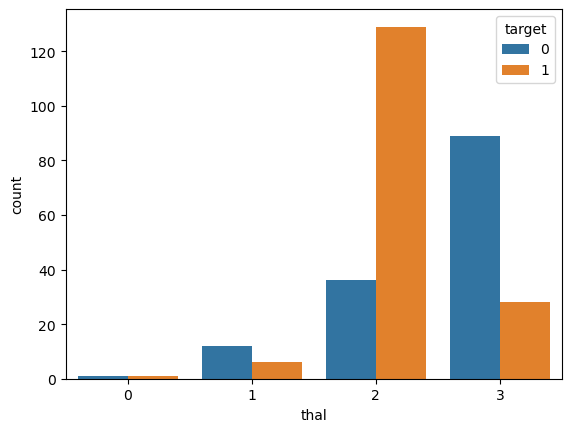

In [48]:
sns.countplot(x=df['thal'],hue=df['target'])
plt.show()
import warnings

warnings.simplefilter("ignore")


g.	State what relationship exists between peak exercising and the occurrence of a heart attack


In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,blood_pressure,affected,age_range,chol_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,lessthan150,affected,60+,200-300
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,lessthan150,affected,30-39,200-300
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,lessthan150,affected,40-49,200-300
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,lessthan150,affected,50-59,200-300
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,lessthan150,affected,50-59,300-400


In [50]:
df['exang'].nunique()

2

<AxesSubplot:xlabel='target', ylabel='exang'>

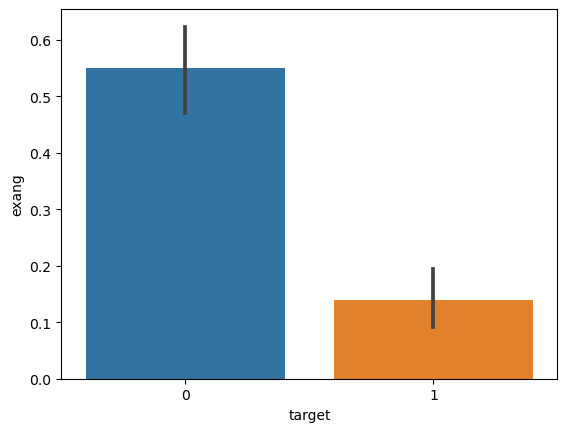

In [51]:
sns.barplot(y=df['exang'],x=df['target'])

In [52]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='sex', ylabel='count'>

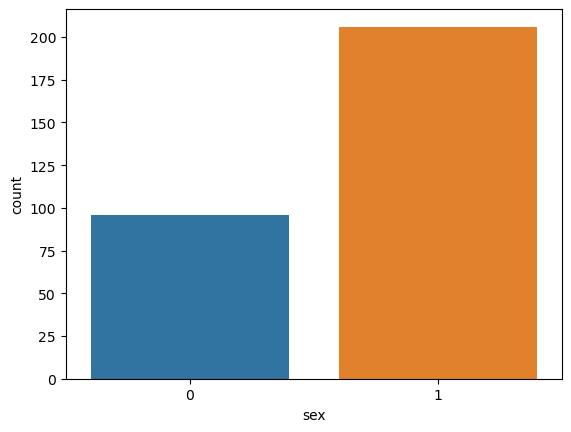

In [53]:
sns.countplot(x='sex', data=df)

In [54]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='target', ylabel='trestbps'>

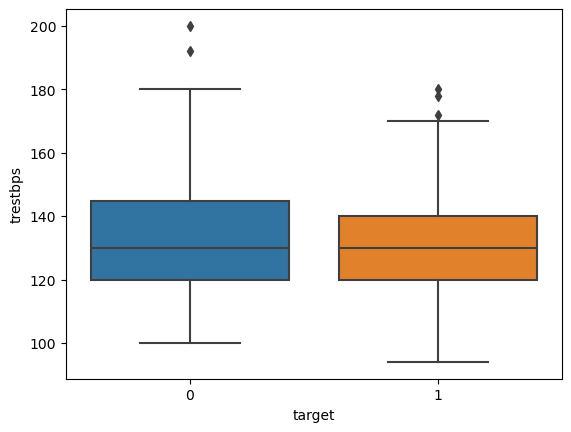

In [55]:
import seaborn as sns
sns.boxplot(x='target', y='trestbps', data=df)

In [56]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [57]:
df=df.assign(affected='')
for i,row in df.iterrows():
    if row['target'] == 1:
        df.loc[i,'affected']='affected'
    else:
        df.loc[i,'affected']='not affected'

In [58]:
df.head(500)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,blood_pressure,affected,age_range,chol_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,lessthan150,affected,60+,200-300
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,lessthan150,affected,30-39,200-300
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,lessthan150,affected,40-49,200-300
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,lessthan150,affected,50-59,200-300
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,lessthan150,affected,50-59,300-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,lessthan150,not affected,50-59,200-300
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,lessthan150,not affected,40-49,200-300
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,lessthan150,not affected,60+,<200
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,lessthan150,not affected,50-59,<200


In [59]:
df['affected'].value_counts()

affected        164
not affected    138
Name: affected, dtype: int64

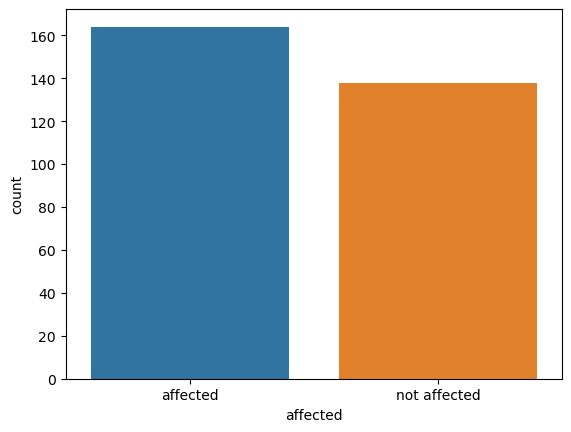

In [60]:
sns.countplot(x=df['affected'],data=df)
plt.show()

In [61]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,blood_pressure,affected,age_range,chol_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,lessthan150,affected,60+,200-300
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,lessthan150,affected,30-39,200-300
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,lessthan150,affected,40-49,200-300
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,lessthan150,affected,50-59,200-300
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,lessthan150,affected,50-59,300-400


In [62]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,blood_pressure,affected,age_range,chol_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,lessthan150,affected,60+,200-300
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,lessthan150,affected,30-39,200-300
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,lessthan150,affected,40-49,200-300
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,lessthan150,affected,50-59,200-300
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,lessthan150,affected,50-59,300-400


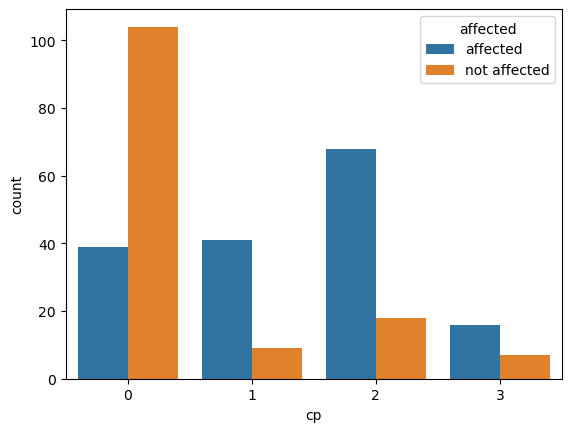

In [63]:
sns.countplot(x=df['cp'],hue=df['affected'])
plt.show()

From the above data we can conclude that the type 2 chest pain has the maximum chances of getting affected by CVD

In [64]:
df['cp'].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

In [65]:
df['slope'].value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

<AxesSubplot:xlabel='fbs', ylabel='count'>

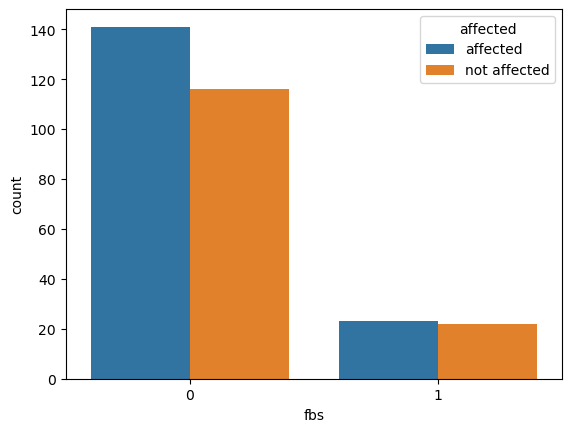

In [66]:
sns.countplot(x=df['fbs'],hue=df['affected'])

In [67]:
df['fbs'].value_counts()

0    257
1     45
Name: fbs, dtype: int64

In [68]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
125     7
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [69]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,blood_pressure,affected,age_range,chol_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,lessthan150,affected,60+,200-300
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,lessthan150,affected,30-39,200-300
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,lessthan150,affected,40-49,200-300
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,lessthan150,affected,50-59,200-300
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,lessthan150,affected,50-59,300-400


In [70]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,blood_pressure,affected,age_range,chol_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,lessthan150,affected,60+,200-300
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,lessthan150,affected,30-39,200-300
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,lessthan150,affected,40-49,200-300
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,lessthan150,affected,50-59,200-300
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,lessthan150,affected,50-59,300-400


In [72]:
df=df.drop(columns=['blood_pressure','affected','age_range','chol_range'],axis=1)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [82]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train=train_test_split(X,y,random_state=42,test_size=0.2)

In [83]:
model=LogisticRegression(random_state=42)

In [84]:
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [85]:
df.iloc[:, :-1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [86]:
df.iloc[:, -1]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [87]:
y_pred=model.predict(X_test)

In [90]:
y_pred_proba = model.predict_proba(X_test)

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

Accuracy: 0.80
Precision: 0.77
Recall: 0.92
F1-Score: 0.83
